In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.datasets import make_blobs

In [3]:
x,y=make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)


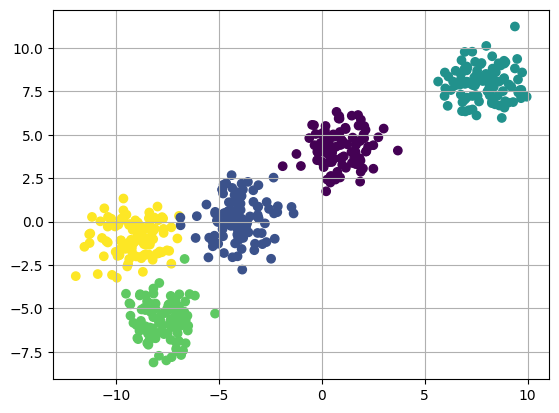

In [4]:
fig=plt.figure(0)
plt.grid(True)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [5]:
k=5
colors=['green','yellow','blue','purple','cyan']
clusters={}

for i in range(k):
    center=10*(2*np.random.random((x.shape[1]))-1)

    cluster={
        'center':center,
        'points':[],
        'color':colors[i]
    }
    
    clusters[i]=cluster

In [6]:
clusters

{0: {'center': array([5.60512483, 2.69675085]),
  'points': [],
  'color': 'green'},
 1: {'center': array([-5.04753093,  3.34178951]),
  'points': [],
  'color': 'yellow'},
 2: {'center': array([-0.15536839,  4.42309669]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([ 7.40669464, -5.5737781 ]),
  'points': [],
  'color': 'purple'},
 4: {'center': array([-8.2569608 , -0.97866862]),
  'points': [],
  'color': 'cyan'}}

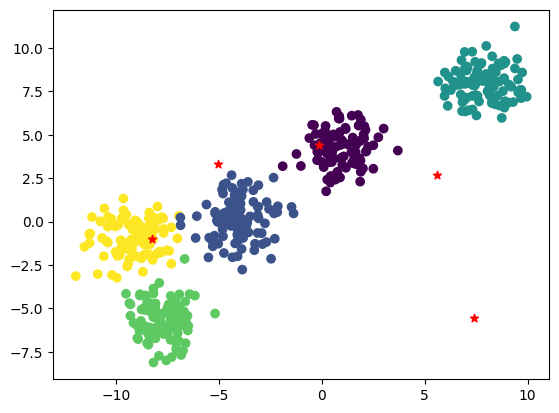

In [7]:
plt.scatter(x[:,0],x[:,1],c=y)

for i in clusters:
    center=clusters[i]['center']
    plt.scatter(center[0],center[1],marker='*',c='red') 
plt.show()

# E-Step : Getting minimum distance

In [8]:
def distance(v1,v2):
    return np.sqrt(np.sum(v1-v2)**2)

In [10]:
v1=np.array([1,3])
v2=np.array([3,4])
distance(v1,v2)

3.0

In [13]:
def assign_clusters():
    for i in range(x.shape[0]):
        dist=[]
        curr_x=x[i]
        
        for j in range(k):
            dis=distance(curr_x,clusters[j]['center'])
            dist.append(dis)
        curr_cluster =np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)

In [14]:
assign_clusters()

In [16]:
clusters

{0: {'center': array([5.60512483, 2.69675085]),
  'points': [array([-6.94238952, -6.8807223 ]),
   array([8.14492336, 7.52724561]),
   array([-3.61995355, -0.07726913]),
   array([-8.91918262, -6.772189  ]),
   array([-7.37151112, -5.0506429 ]),
   array([8.14492336, 7.52724561]),
   array([7.44598269, 9.20313614]),
   array([8.73872704, 5.97009465]),
   array([8.84851188, 9.26501008]),
   array([8.27287322, 6.92062212]),
   array([6.96905011, 6.3449164 ]),
   array([7.03293513, 7.14165643]),
   array([7.31936447, 6.46038969]),
   array([8.62460249, 6.68412192]),
   array([9.37763125, 8.82221751]),
   array([7.33596746, 7.8622887 ]),
   array([6.69914682, 7.88649907]),
   array([8.79679601, 7.51599724]),
   array([7.51057077, 6.11484261]),
   array([0.8614512 , 5.93258376]),
   array([2.12414555, 5.28234711]),
   array([8.27421397, 9.52409703]),
   array([8.81683548, 9.15218311]),
   array([2.2494291 , 4.31194285]),
   array([2.74537548, 4.85700872]),
   array([9.62662186, 7.57682932])

In [20]:
def plot_cluster():
    for i in clusters:
        pts=np.array(clusters[i]['points'])
        try:
            plt.scatter(pts[:,0],pts[:,1],c=clusters[i]['color'])
        except:
            pass
        
        center=clusters[i]['center']
        plt.scatter(center[0],center[1],c='black',marker="*")

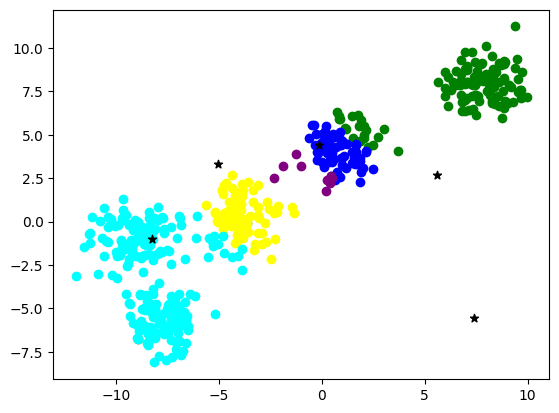

In [22]:
plot_cluster()

# M-Step : Updating Centers

In [26]:
def update_clusters():
    for i in range(k):
        pts=np.array(clusters[i]['points'])
        if(pts.shape[0]>0):
            new_center=pts.mean(axis=0)
            clusters[i]['center']=new_center
            clusters[i]['points']=[]

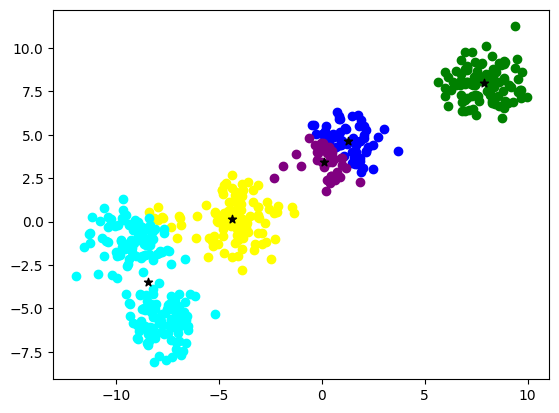

In [32]:
assign_clusters()
plot_cluster()
update_clusters()

# K-Means using Scikit lib


In [33]:
from sklearn.cluster import KMeans

In [34]:
km=KMeans(n_clusters=5)

In [35]:
x,y=make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)


In [37]:
km.fit(x,y)

C:\Users\Rizwal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [42]:
centers=km.cluster_centers_

In [48]:
labels=km.labels_

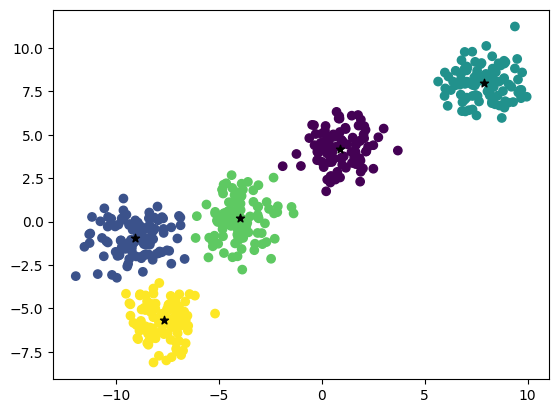

In [49]:
plt.scatter(x[:,0],x[:,1],c=labels)
plt.scatter(centers[:,0],centers[:,1],c='black',marker="*")
plt.show()